# Demonstration of APEX-DAG: Library and Language independent Pipeline EXtraction
<br>
<div style="display: flex; justify-content: center; width: 100%;">
    <div style="text-align: center; margin: 0 20px;">
        <strong>Sebastian Eggers</strong><br>
        BIFOLD & TU Berlin<br>
        <a href="mailto:sebastian.eggers@campus.tu-berlin.de">sebastian.eggers@campus.tu-berlin.de</a>
    </div>
    <div style="text-align: center; margin: 0 20px;">
        <strong>Nina Żukowska</strong><br>
        BIFOLD & TU Berlin<br>
        <a href="mailto:zukowska@tu-berlin.de">zukowska@tu-berlin.de</a>
    </div>
    <div style="text-align: center; margin: 0 20px;">
        <strong>Ziawasch Abedjan</strong><br>
        BIFOLD & TU Berlin<br>
        <a href="mailto:abedjan@tu-berlin.de">abedjan@tu-berlin.de</a>
    </div>
</div>
<br>
<br>
<input type="checkbox" /> Develop a small machine learning pipeline with the Polars and observe APEX-DAG output <br>
<input type="checkbox" /> Showcase pre-training method

In [1]:
import polars as pl

In [4]:
df = pl.read_csv("./data/titanic/dataset.csv")
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [3]:
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"])
df.head()

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
i64,i64,str,f64,i64,i64,f64,str
0,3,"""male""",22.0,1,0,7.25,"""S"""
1,1,"""female""",38.0,1,0,71.2833,"""C"""
1,3,"""female""",26.0,0,0,7.925,"""S"""
1,1,"""female""",35.0,1,0,53.1,"""S"""
0,3,"""male""",35.0,0,0,8.05,"""S"""


In [4]:
df = df.to_dummies(["Pclass", "Sex", "Embarked"])

df.describe()

statistic,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_null
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",891.0,891.0,891.0,891.0,891.0,891.0,714.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,177.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.383838,0.242424,0.20651,0.551066,0.352413,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.08642,0.722783,0.002245
"""std""",0.486592,0.42879,0.405028,0.497665,0.47799,0.47799,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.047351
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,7.925,0.0,0.0,0.0,0.0
"""50%""",0.0,0.0,0.0,1.0,0.0,1.0,28.0,0.0,0.0,14.4542,0.0,0.0,1.0,0.0
"""75%""",1.0,0.0,0.0,1.0,1.0,1.0,38.0,1.0,0.0,31.0,0.0,0.0,1.0,0.0
"""max""",1.0,1.0,1.0,1.0,1.0,1.0,80.0,8.0,6.0,512.3292,1.0,1.0,1.0,1.0


In [7]:
age_median = df.group_by("Pclass_1", "Pclass_2", "Pclass_3").agg(pl.col("Age").median().alias("median_age"))

df = df.join(age_median, on=["Pclass_1", "Pclass_2", "Pclass_3"], how="left")
df = df.with_columns(pl.when(pl.col("Age").is_null()).then(pl.col("median_age")).otherwise(pl.col("Age")).alias("Age"))
df = df.drop("median_age")

df.describe()

statistic,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_null,median_age_right
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.383838,0.242424,0.20651,0.551066,0.352413,0.647587,29.066409,0.523008,0.381594,32.204208,0.188552,0.08642,0.722783,0.002245,28.184063
"""std""",0.486592,0.42879,0.405028,0.497665,0.47799,0.47799,13.244532,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.047351,5.353337
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
"""25%""",0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,7.925,0.0,0.0,0.0,0.0,24.0
"""50%""",0.0,0.0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,14.4542,0.0,0.0,1.0,0.0,24.0
"""75%""",1.0,0.0,0.0,1.0,1.0,1.0,37.0,1.0,0.0,31.0,0.0,0.0,1.0,0.0,29.0
"""max""",1.0,1.0,1.0,1.0,1.0,1.0,80.0,8.0,6.0,512.3292,1.0,1.0,1.0,1.0,37.0


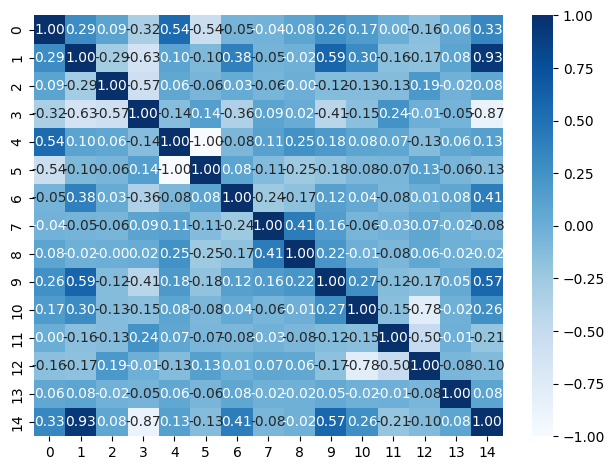

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr() 
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.tight_layout()

In [9]:
df = df.with_columns(((pl.col("Age") - pl.col("Age").min()) / (pl.col("Age").max() - pl.col("Age").min())).alias("Age"))
df = df.with_columns(((pl.col("Parch") - pl.col("Parch").min()) / (pl.col("Parch").max() - pl.col("Parch").min())).alias("Parch"))
df = df.with_columns(((pl.col("Fare") - pl.col("Fare").min()) / (pl.col("Fare").max() - pl.col("Fare").min())).alias("Fare"))
df = df.with_columns(((pl.col("SibSp") - pl.col("SibSp").min()) / (pl.col("SibSp").max() - pl.col("SibSp").min())).alias("SibSp"))

df.describe()

statistic,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_null,median_age_right
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.383838,0.242424,0.20651,0.551066,0.352413,0.647587,0.35997,0.065376,0.063599,0.062858,0.188552,0.08642,0.722783,0.002245,28.184063
"""std""",0.486592,0.42879,0.405028,0.497665,0.47799,0.47799,0.16643,0.137843,0.134343,0.096995,0.391372,0.281141,0.447876,0.047351,5.353337
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
"""25%""",0.0,0.0,0.0,0.0,0.0,0.0,0.271174,0.0,0.0,0.015469,0.0,0.0,0.0,0.0,24.0
"""50%""",0.0,0.0,0.0,1.0,0.0,1.0,0.321438,0.0,0.0,0.028213,0.0,0.0,1.0,0.0,24.0
"""75%""",1.0,0.0,0.0,1.0,1.0,1.0,0.459663,0.125,0.0,0.060508,0.0,0.0,1.0,0.0,29.0
"""max""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,37.0


In [10]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df.drop("Survived").to_numpy()
y = df["Survived"].to_numpy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

import matplotlib.pyplot as plt

# Train the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]